# Solar Spectrum

Figure 1.3 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of the solar spectrum (spectral irradiance vs. wavelength) at 1 AU compared to a 5772K blackbody. 
Solar irradiance data is the 
[ASTM E-490-00 solar spectrum](https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html) 
from the US Department of Energy's National Renewable Energy Laboratory 
([NREL](https://www.nrel.gov/index.html)).

In [11]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [12]:
plotFile = 'Fig1_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Solar Spectrum Data

Source data have been converted into a 3-column file: wavelength in nm, spectral irradiance in 
erg/s/cm<sup>2</sup>/nm, and a T=5772K black body in the same spectral irradiance units.  We
read the first two and compute the third for ourselves.

In [13]:
dataFile = 'Sun_ASTME-490-00.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
lam = 10.0*np.array(data['Lam'])    # convert nm to Angstroms
sunSpec = 0.1*np.array(data['Sun'])

# Limits

lamMin = 1000.   # Angstroms
lamMax = 11000.
irrMin = 0.0     # erg/s/cm^2/Angstrom
irrMax = 230.0

## Blackbody Spectrum

Compute a blackbody spectrum for T=5772K (T<sub>eff</sub> of the Sun) for wavelength in nanometers and 
spectral irradiance in units of erg/s/cm<sup>2</sup>/nm.

In [14]:
# CODATA 2018 physical constants - all are exact

h = 6.62607015e-34 # Planck constant in J/Hz
k = 1.380649e-23 # Boltzmann constant in J/K
c = 299792458 # speed of light in a vacuum in m/s

# Sun Teff

Tsun = 5772

# Solar Irradiance (IAU 2015 Resolution B3)

Ssolar = 1361 # W/m^2

# First radiation constant, c1=h*c^2 

c1 = h*c**2

# Second radiation constant c2=hc/k

c2 = h*c/k

# hc/kT in nanometers for Tsun

hc_kT = 1.0e9*c2/Tsun # nanometers

# wavelengths for the BB curve in nanometers

lamBB = np.linspace(0.1*lamMin,0.1*lamMax,2001)

# BB irradiance, factor of 10^31 is to get the units to be erg/s/cm^2/nm to match the ASTME units

bbSpec = Ssolar * 1.0e31 * c1 / (lamBB**5 * (np.exp(hc_kT/lamBB) - 1.0))

### Figure 1.3

Plot of solar spectral irradiance as a function of wavelength in Angstroms for the reference solar spectrum.
A T=5772K blackbody with the same total irradiance is plotted as a dashed line.

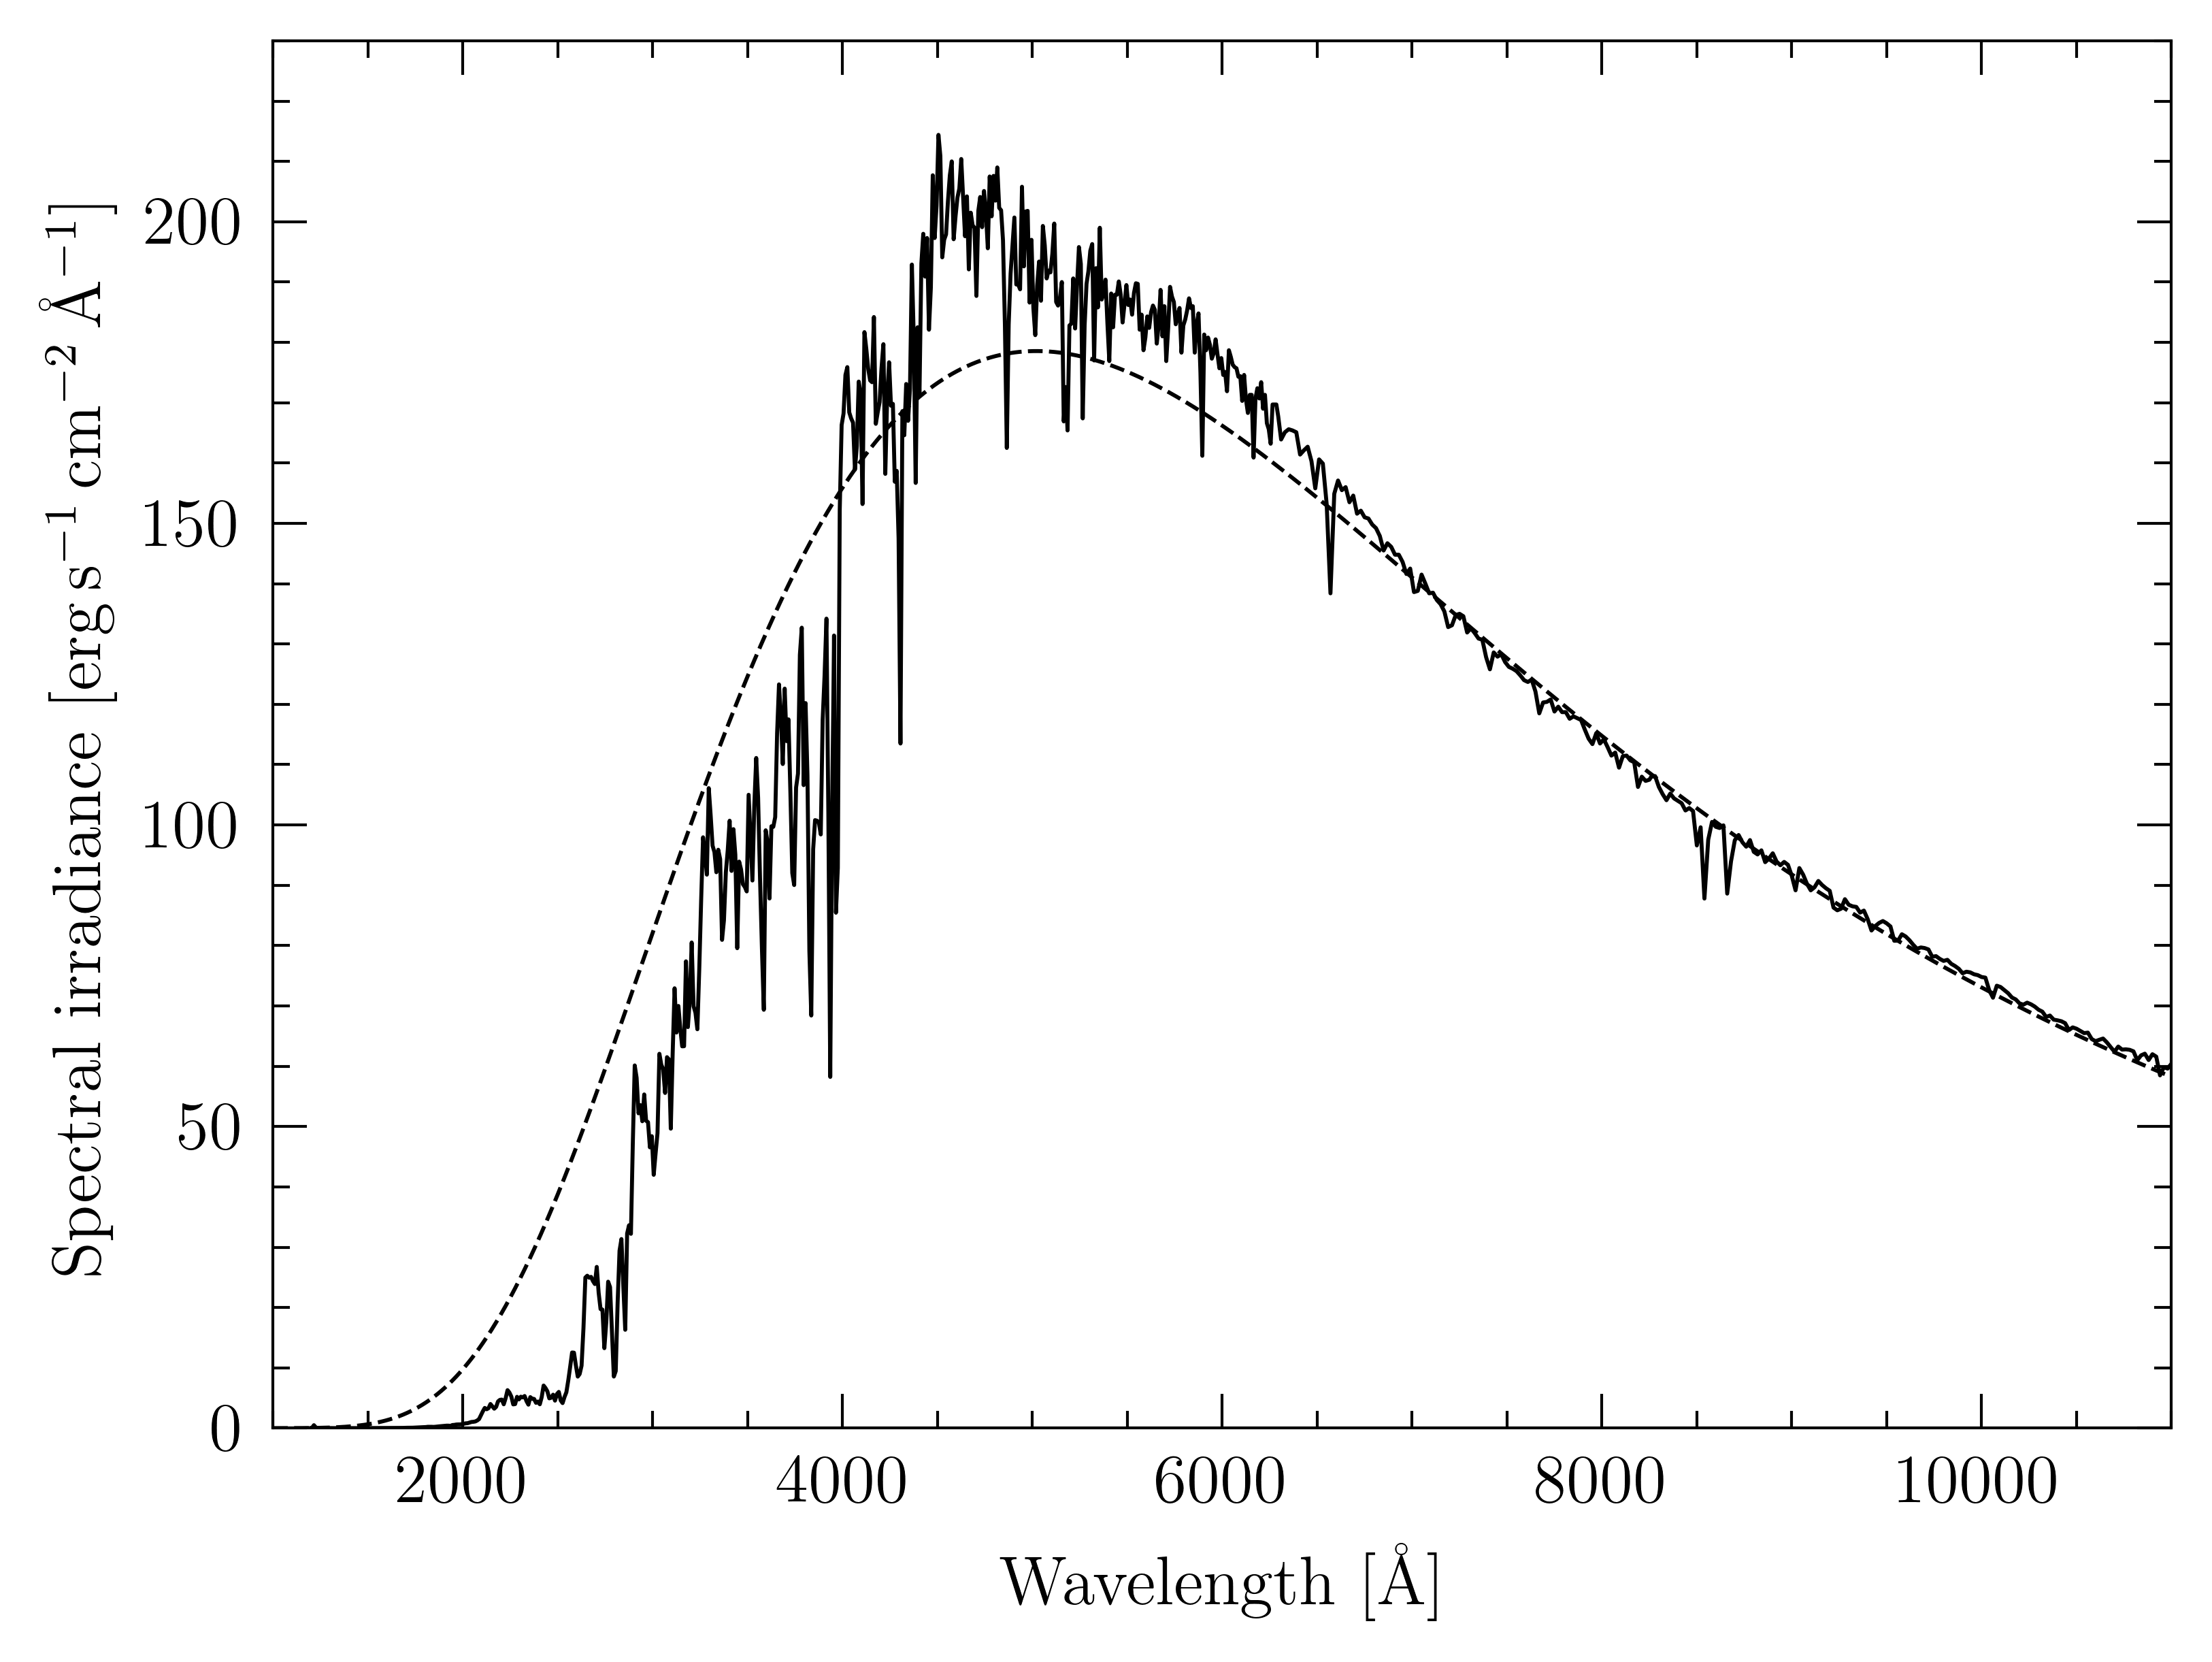

In [15]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(lamMin,lamMax)
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.set_xlabel(r'Wavelength [\AA]',fontsize=axisFontSize)

ax.set_ylim(irrMin,irrMax)
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel(r'Spectral irradiance [erg\,s$^{-1}$\,cm$^{-2}$\,\AA$^{-1}$]',fontsize=axisFontSize)

ax.plot(lam,sunSpec,'-',color='black',lw=0.7,zorder=10)
ax.plot(10*lamBB,bbSpec,'--',color='black',lw=0.7)

ax.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')